In [2]:
import numpy as np
import seaborn as sns
from tqdm import tqdm_notebook

%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.family'] = 'DejaVu Sans'

from sklearn import metrics
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

RANDOM_STATE = 17

In [8]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [3]:
X_train = np.loadtxt("X_train.txt")
y_train = np.loadtxt("y_train.txt").astype(int)

X_test = np.loadtxt("X_test.txt")
y_test = np.loadtxt("y_test.txt").astype(int)

In [4]:
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

In [13]:
np.unique(y)

array([1, 2, 3, 4, 5, 6])

In [5]:
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

In [18]:
pca = PCA(n_components=0.9, random_state=17)
X_pca = pca.fit_transform(X_scaled)

Text(0, 0.5, 'y')

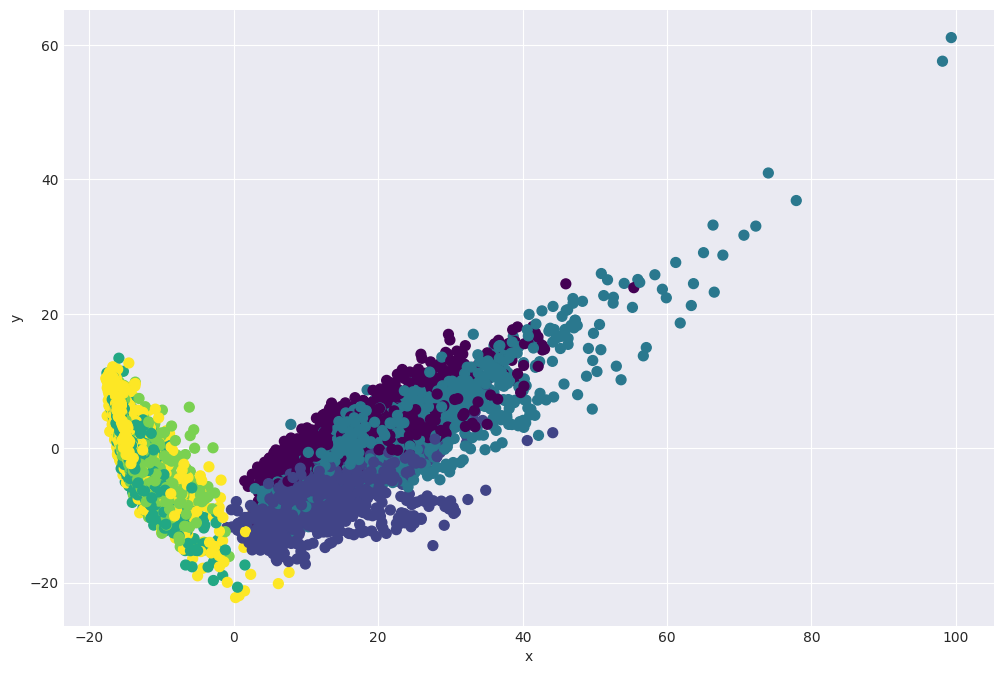

In [22]:
plt.figure(figsize=(12,8))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, s=50, cmap='viridis')
plt.xlabel('x')
plt.ylabel('y')

In [19]:
kmeans = KMeans(n_clusters=6, random_state=RANDOM_STATE, n_init=100)
kmeans.fit(X_pca)

KMeans(n_clusters=6, n_init=100, random_state=17)

Text(0, 0.5, 'y')

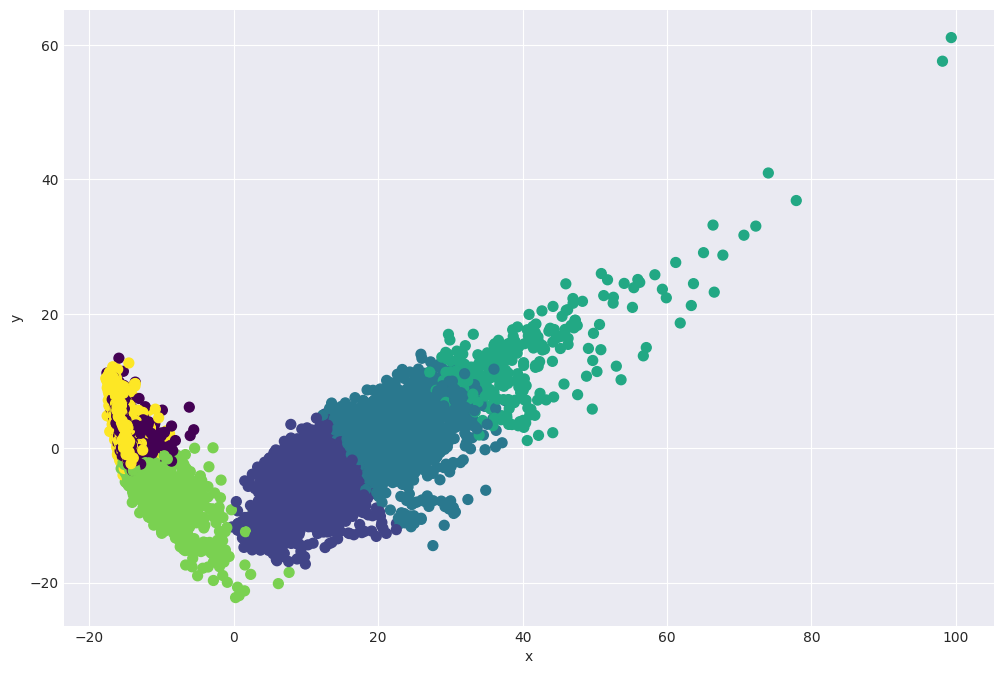

In [20]:
plt.figure(figsize=(12,8))
plt.scatter(X_pca[:,0], X_pca[:,1], c=kmeans.labels_, s=50, cmap='viridis')
plt.xlabel('x')
plt.ylabel('y')

In [21]:
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, kmeans.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(y, kmeans.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(y, kmeans.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(y, kmeans.labels_))
print("Adjusted mutual info score: %.3f"
      % metrics.adjusted_mutual_info_score(y, kmeans.labels_))

print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_pca, kmeans.labels_, sample_size=1000))

Homogeneity: 0.541
Completeness: 0.581
V-measure: 0.560
Adjusted Rand-Index: 0.420
Adjusted mutual info score: 0.560
Silhouette Coefficient: 0.136


In [26]:
ag = AgglomerativeClustering(n_clusters=6, 
                             linkage='ward').fit(X_pca)

Text(0, 0.5, 'y')

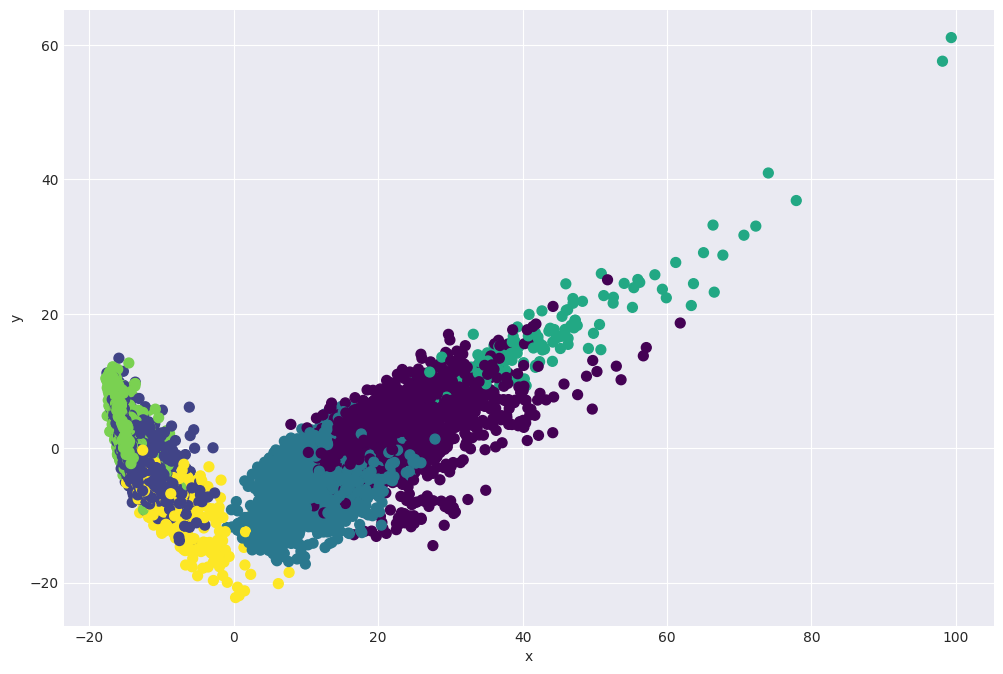

In [27]:
plt.figure(figsize=(12,8))
plt.scatter(X_pca[:,0], X_pca[:,1], c=ag.labels_, s=50, cmap='viridis')
plt.xlabel('x')
plt.ylabel('y')

In [28]:
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, ag.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(y, ag.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(y, ag.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(y, ag.labels_))
print("Adjusted mutual info score: %.3f"
      % metrics.adjusted_mutual_info_score(y, ag.labels_))

print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_pca, ag.labels_, sample_size=1000))
# показывает результаты в целом лучше чем KMeans, однако знаение Silhouette Coefficient чуть меньше, значит кластеры чуть хуже отделены друг от друга

Homogeneity: 0.578
Completeness: 0.673
V-measure: 0.622
Adjusted Rand-Index: 0.494
Adjusted mutual info score: 0.622
Silhouette Coefficient: 0.132


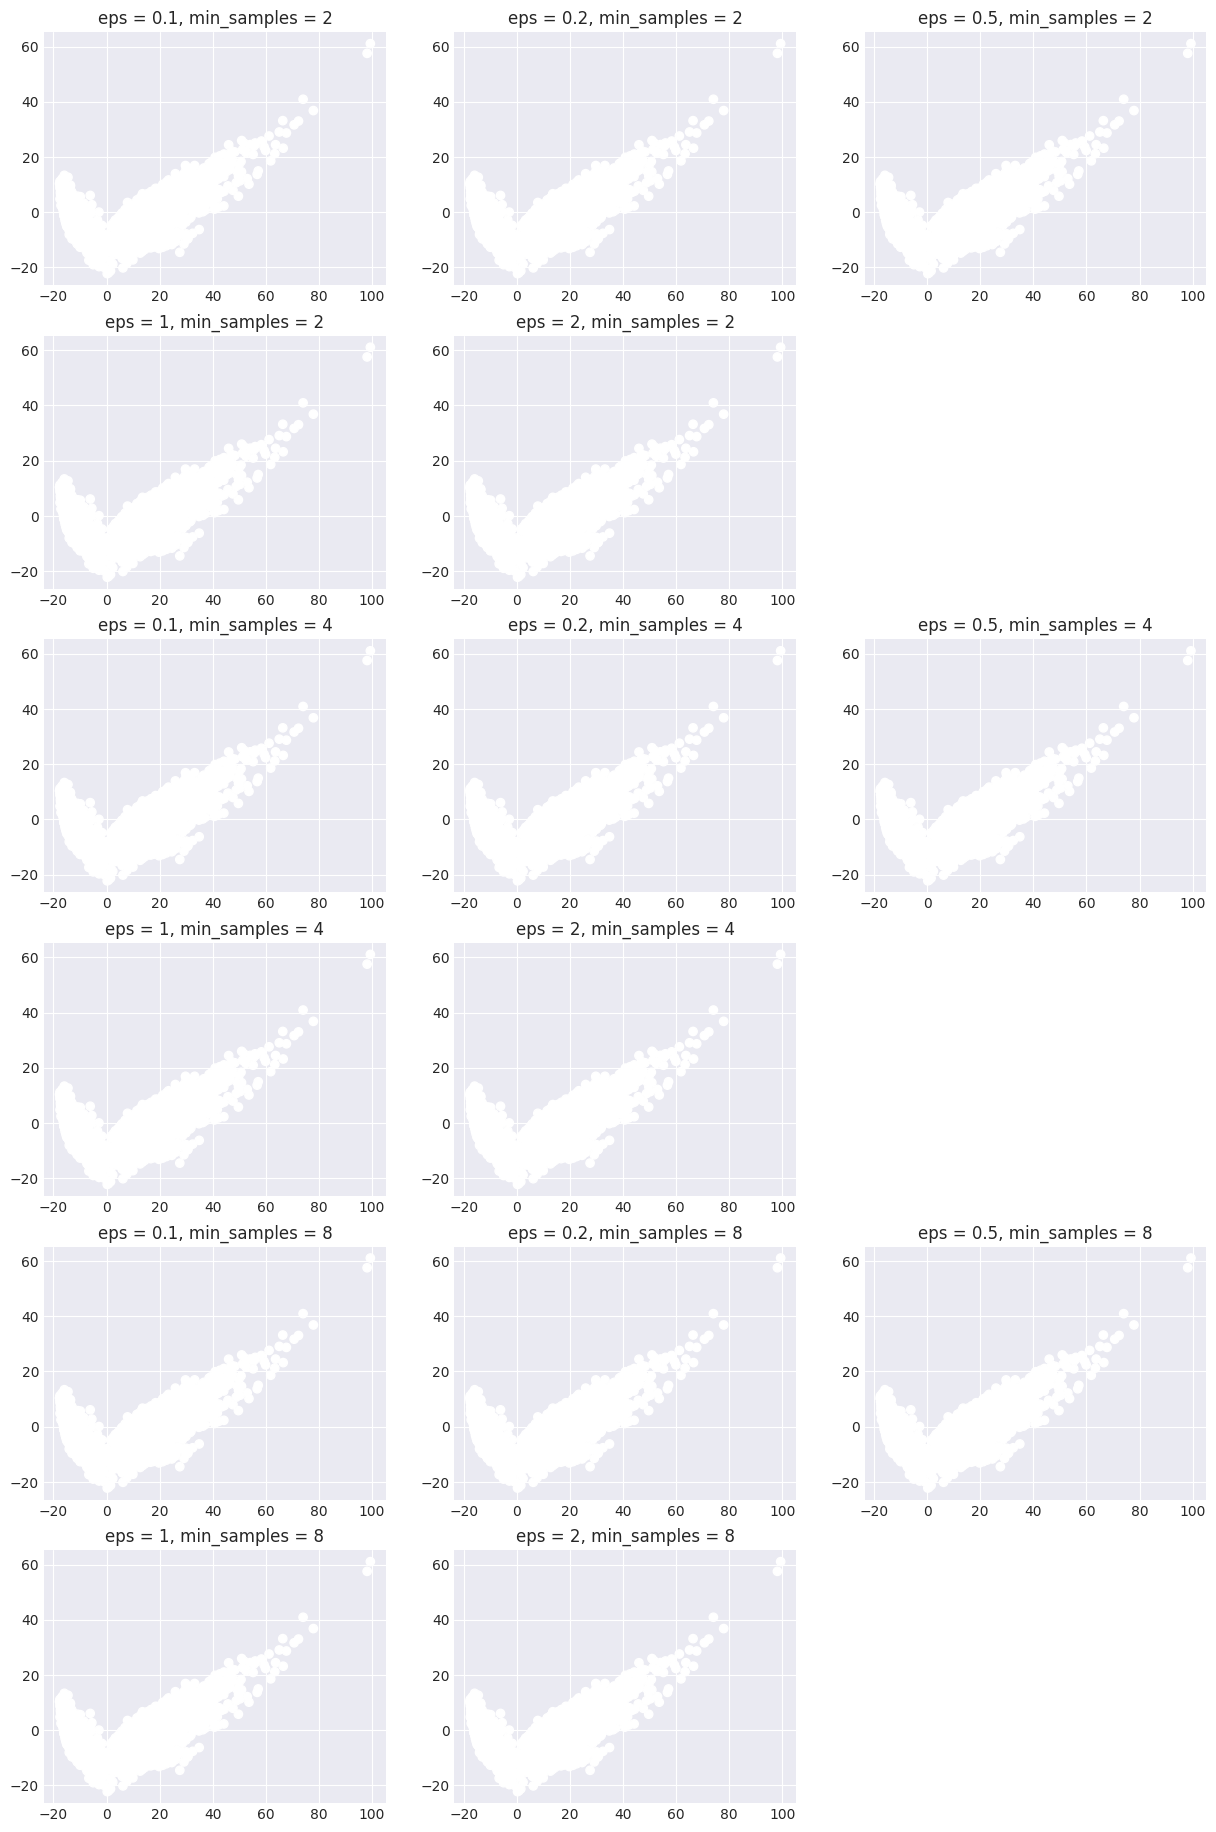

In [29]:
from sklearn.cluster import DBSCAN

plt.figure(figsize= (15,23))
i = 1
for samples in [2, 4, 8]:
    for e in [0.1, 0.2, 0.5, 1, 2]:
        dbscan = DBSCAN(eps=e, min_samples=samples)
        clusters = dbscan.fit_predict(X_pca)
        plt.subplot(6, 3, i)
        plt.scatter(X_pca[:,0], X_pca[:,1], c = clusters)
        plt.title('eps = {}, min_samples = {}'.format(e, samples))
        i += 1
    i+=1

plt.show()

In [30]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.3, min_samples=7).fit(X_pca)

Text(0, 0.5, 'y')

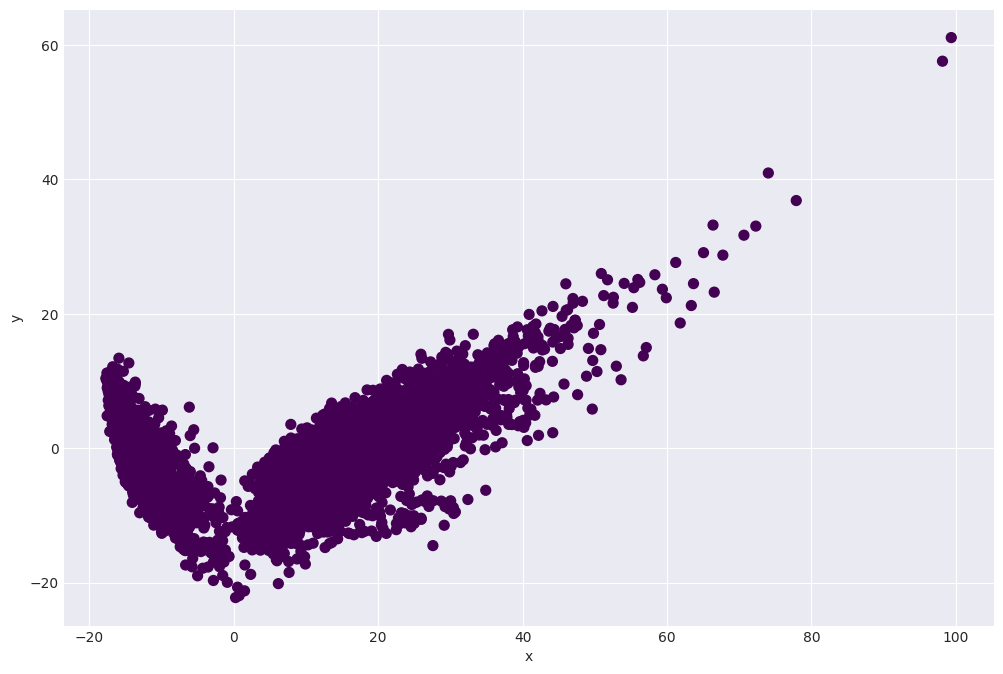

In [32]:
plt.figure(figsize=(12,8))
plt.scatter(X_pca[:,0], X_pca[:,1], c=dbscan.labels_, s=50, cmap='viridis')
plt.xlabel('x')
plt.ylabel('y')

In [33]:
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, dbscan.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(y, dbscan.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(y, dbscan.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(y, dbscan.labels_))
print("Adjusted mutual info score: %.3f"
      % metrics.adjusted_mutual_info_score(y, dbscan.labels_))

print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_pca, dbscan.labels_, sample_size=1000))

# вообще не справляется


Homogeneity: 0.000
Completeness: 1.000
V-measure: 0.000
Adjusted Rand-Index: 0.000
Adjusted mutual info score: 0.000


ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [34]:
from sklearn.cluster import AffinityPropagation

affinity_propagation = AffinityPropagation().fit(X_pca)

Text(0, 0.5, 'y')

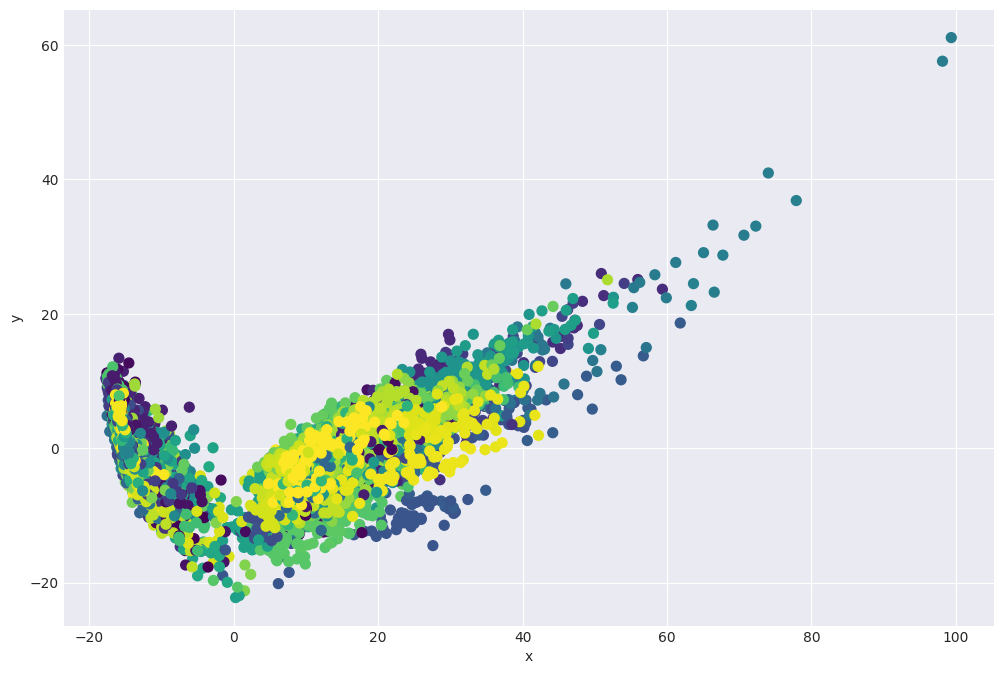

In [35]:
plt.figure(figsize=(12,8))
plt.scatter(X_pca[:,0], X_pca[:,1], c=affinity_propagation.labels_, s=50, cmap='viridis')
plt.xlabel('x')
plt.ylabel('y')

In [36]:
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, affinity_propagation.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(y, affinity_propagation.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(y, affinity_propagation.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(y, affinity_propagation.labels_))
print("Adjusted mutual info score: %.3f"
      % metrics.adjusted_mutual_info_score(y, affinity_propagation.labels_))

print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_pca, affinity_propagation.labels_, sample_size=1000))

# показывает слабые результаты, т.к. нельзя указать количество кластеров, поэтому их опрделяется больше, чем нужно

Homogeneity: 0.846
Completeness: 0.284
V-measure: 0.425
Adjusted Rand-Index: 0.044
Adjusted mutual info score: 0.412
Silhouette Coefficient: 0.001


In [37]:
from sklearn.cluster import Birch

brc = Birch(threshold=0.5, n_clusters=6).fit(X_pca)

Text(0, 0.5, 'y')

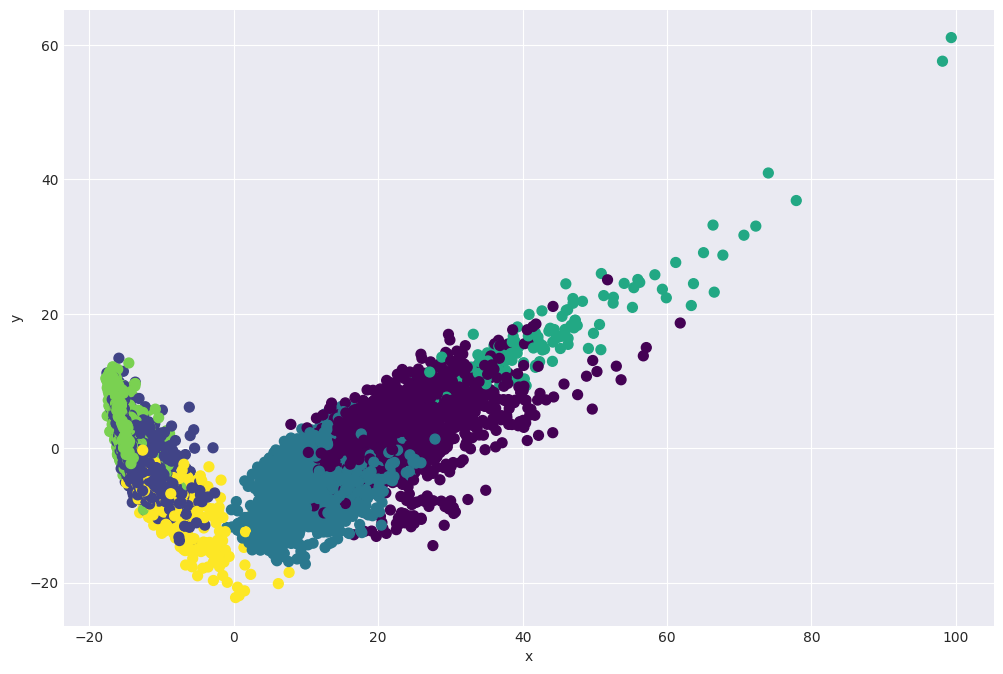

In [38]:
plt.figure(figsize=(12,8))
plt.scatter(X_pca[:,0], X_pca[:,1], c=brc.labels_, s=50, cmap='viridis')
plt.xlabel('x')
plt.ylabel('y')

In [39]:
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, brc.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(y, brc.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(y, brc.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(y, brc.labels_))
print("Adjusted mutual info score: %.3f"
      % metrics.adjusted_mutual_info_score(y, brc.labels_))

print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_pca, brc.labels_, sample_size=1000))

# показывает по всем метрикам такое же значение как и AgglomerativeClustering, только значение Silhouette Coefficient выше, значит кластеры чуть лучше отделены друг от друга

Homogeneity: 0.578
Completeness: 0.673
V-measure: 0.622
Adjusted Rand-Index: 0.494
Adjusted mutual info score: 0.622
Silhouette Coefficient: 0.148


In [45]:
import pandas as pd

tab = pd.crosstab(y, brc.labels_)
tab.index = ['walking', 'going up the stairs', 'going down the stairs', 'sitting', 'standing', 'lying']
tab.columns = ['cluster' + str(i + 1) for i in range(6)]
tab

,cluster1,cluster2,cluster3,cluster4,cluster5,cluster6
walking,800,0,896,26,0,0
going up the stairs,337,0,1207,0,0,0
going down the stairs,1144,0,138,124,0,0
sitting,0,1559,0,0,71,147
standing,0,1832,0,0,0,74
lying,0,74,0,0,1604,266


Наилучшие результаты показала Birch кластеризация, однако кластеры не настолько однородны как хотелось бы. Кластеры, в которых должны были быть виды движения (ходьба, подъем вверх по лестнице, спуск по лестнице) поперемешаны между собой, точно так же как и в кластерах, которые должны были содержать сидение, стояние и лежание эти деятельности смешаны. То есть активные и пасивные виды деятельности противопоставляется друг другу, однако 6 кластеров выделяются не очень точно. Поэтому кластеризация вышла не очень качественной